## 数据清洗：去除人民、非字母词汇、词形还原

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names

string.isalpha() # 检测字符串是否只有字母组成

### 初始化各object 及数据准备 
以下是自己的方法，未定义新函数等，效率很慢

In [6]:
groups = fetch_20newsgroups()
data = groups.data
cv = CountVectorizer(stop_words='english', max_features=500)
lemmatizer = WordNetLemmatizer()
all_names = names.words()

In [23]:
len(data)

11314

In [7]:
posts = [post.split() for post in data] 

In [18]:
len(posts)

11314

In [15]:
words = sum(posts,[])

In [19]:
len(words)

3252437

In [17]:
cleaned = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word not in all_names]

In [22]:
cleaned[:10]
len(cleaned)

['my',
 'what',
 'car',
 'is',
 'university',
 'of',
 'college',
 'i',
 'wa',
 'wondering']

2276462

In [24]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

### 以下是原方法，快很多

In [25]:
def letters_only(astr):
    for c in astr:
        if not c.isalpha():
            return False

    return True

cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

for post in groups.data:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
                             for word in post.split()
                             if letters_only(word)
                             and word not in all_names]))

transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
km = KMeans(n_clusters=20)
km.fit(transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

array([4, 4, 0, 4, 4, 0, 4, 4, 4, 4], dtype=int32)

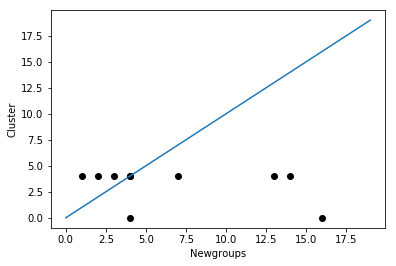

In [46]:
labels = groups.target
labels[:10]
km.labels_[:10]
plt.scatter(labels[:10], km.labels_[:10],color='black')  # 取全集，会有大部分点重叠
plt.plot(range(20),range(20))             # 没在线上的点，即是聚类错误的点
plt.xlabel('Newgroups')
plt.ylabel('Cluster')
plt.show()